In [43]:
"""
Created on Mon Mar 21 09:12:19 2022

@author: amanmajid
"""

import sys
sys.path.insert(0,'..')

import datatoolbox as dt
import matplotlib.pyplot as plt

from src.global_variables import *
from src.utils_benchmarking import *


def benchmarking_main(technology,generation_types,energy_source):
    historic_generational_share = calculate_historical_generational_share(technology,energy_source)
    share_data = calculate_benchmarks(technology,generation_types)
    xdata = dt.tools.xarray.to_XDataArray(share_data)
    print(f'Benchmark lower {region,year}: {xdata.quantile(q=.5,dim="pathway").loc[region,year].item():2.2f}%')
    print(f'Benchmark upper {region,year}: {xdata.quantile(q=.75,dim="pathway").loc[region,year].item():2.2f}%')
    return xdata

In [44]:
#show available sources
print(dt.findp(source = 'IEA_WEB_**').source.unique())

['IEA_WEB_DETAILED_2021' 'IEA_WEB_2019']


In [45]:
#============
# Define vars

energy_source = 'IEA_WEB_2019' 
year = 2050
region = 'World'

Benchmark lower ('World', 2050): 64.35%
Benchmark upper ('World', 2050): 64.35%


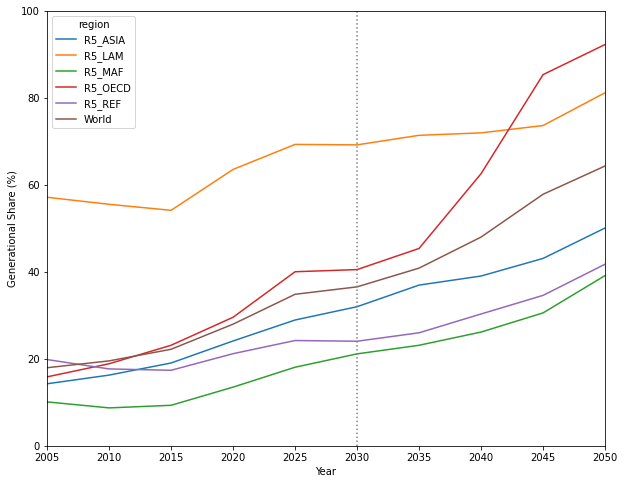

In [61]:
# RES
f = plt.figure(figsize=(10,8))
res_data = benchmarking_main(technology='renewable',generation_types=renewables_generation_types,energy_source=energy_source)
res_data.median(dim='pathway').plot.line(x='time')
plt.xlabel('Year')
plt.ylabel('Generational Share (%)')
plt.xlim([2005,2050])
plt.ylim([0,100])
plt.axvline(x=2030,linestyle=':',color='gray')
f.savefig('../outputs/figures/renewable_benchmarks.png',bbox_inches='tight')

Benchmark lower ('World', 2050): 0.22%
Benchmark upper ('World', 2050): 0.22%


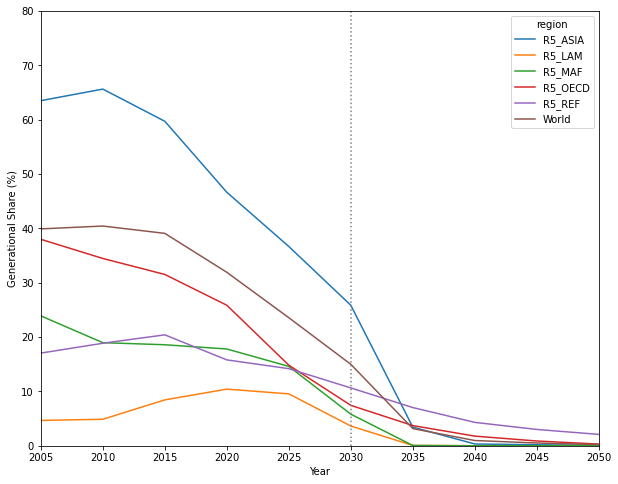

In [62]:
# COAL
f = plt.figure(figsize=(10,8))
coal_data = benchmarking_main(technology='coal',generation_types=unabated_coal_generation_types,energy_source=energy_source)
coal_data.median(dim='pathway').plot.line(x='time')
plt.xlabel('Year')
plt.ylabel('Generational Share (%)')
plt.xlim([2005,2050])
plt.ylim([0,80])
plt.axvline(x=2030,linestyle=':',color='gray')
f.savefig('../outputs/figures/coal_benchmarks.png',bbox_inches='tight')